 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline


# Reading whale returns
csv_path = Path("Resources/whale_returns.csv")

# YOUR CODE HERE
Whale_returns = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

Whale_returns.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls
Whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
Whale_returns = Whale_returns.dropna()

Whale_returns.isnull().sum()

Whale_returns.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Reading whale returns
csv_path = Path("Resources/algo_returns.csv")

algo_returns = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

algo_returns.head(10)


Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
2014-06-04 -0.001838       NaN
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_returns = algo_returns.dropna()

algo_returns.isnull().sum()



Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading algorithmic returns
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Reading S&P 500 Closing Prices

csv_path = Path("Resources/sp500_history.csv")

sp500_history = pd.read_csv(csv_path)


#Assign column names
columns = ["Date", "close"]
sp500_history.columns = columns

#remove column header from first row
sp500_history = sp500_history.iloc[1:]

sp500_history.head()


#Format date
sp500_history['Date'] = pd.to_datetime(sp500_history.Date, dayfirst=True)
sp500_history.head()

#set Index
sp500_history = sp500_history.set_index("Date")

sp500_history.head()


close
Date                 
2019-04-23  $2,933.68
2019-04-22  $2,907.97
2019-04-18  $2,905.03
2019-04-17  $2,900.45
2019-04-16  $2,907.06

In [9]:
# Check Data Types

sp500_history.dtypes
# YOUR CODE HERE

close    object
dtype: object

In [10]:
#Format column as float

sp500_history[sp500_history.columns[0:]] = sp500_history[sp500_history.columns[0:]].replace('[\$,]', '', regex=True).astype(float)

sp500_history.head()

#sort column in ascending order
sp500 = sp500_history.sort_index(ascending=True)

sp500.head()


# YOUR CODE HERE

close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93

In [11]:
sp500.dtypes

close    float64
dtype: object

In [12]:
# Calculate Daily Returns



daily_returns = sp500.pct_change()

daily_returns.head()

# YOUR CODE HERE




close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [13]:
# Drop nulls
#daily_returns.isnull()
daily_returns.isnull().sum()


#drop nulls

daily_returns = daily_returns.dropna().copy()


daily_returns.head()

close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [14]:
#Display current column names

daily_returns.columns

# Rename Column
columns = ["S&P 500"]

daily_returns.columns = columns

daily_returns.head()




S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
#join by columns using inner

combined_returns = pd.concat([Whale_returns, algo_returns, daily_returns], axis="columns", join="inner")

combined_returns.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

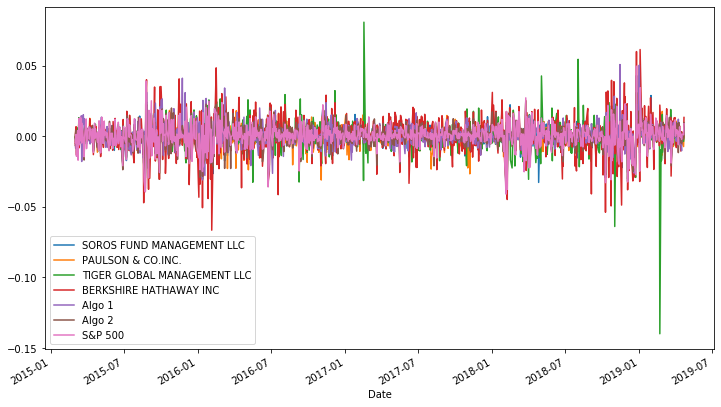

In [16]:
# Plot daily returns

combined_returns.plot(figsize=(12,7))

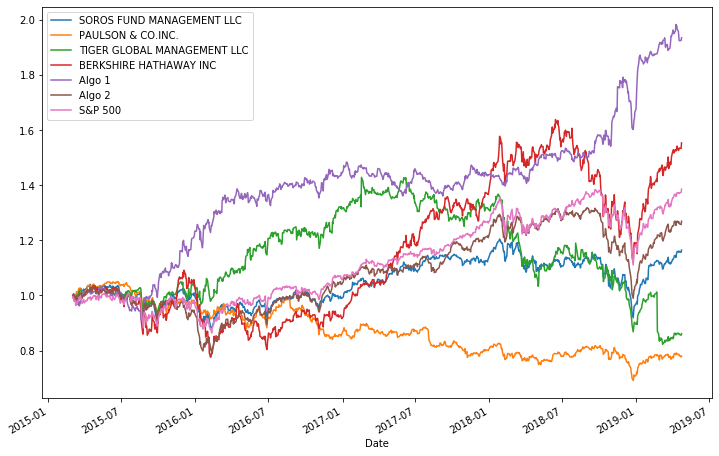

In [17]:
# Plot cumulative returns

#calculate cum returns
cumulative_returns = (1 + combined_returns).cumprod()


# YOUR CODE HERE
cumulative_returns.plot(figsize=(12,8))

In [18]:
#Does any portfolio outperform the S&P 500?
#Generally speaking, Algo 1 and  Berkshire Hathaway seems to outperform the S&P 500.

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

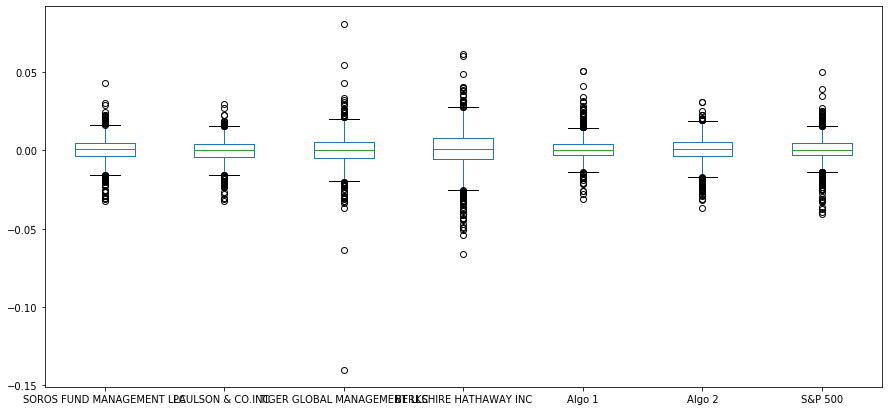

In [19]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(15,7))



# YOUR CODE HERE

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = combined_returns.std()

daily_std.head(10)

# Which portfolios are riskier than the S&P 500?



SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500

daily_std["S&P 500"]<daily_std



SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [22]:
# Determine which portfolios are riskier than the S&P 500
#TIGER GLOBAL MANAGEMENT LLC  and BERKSHIRE HATHAWAY INC are riskier than the S&P 500.

In [23]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)

annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [24]:
# Calculate and plot the rolling standard deviation for

# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

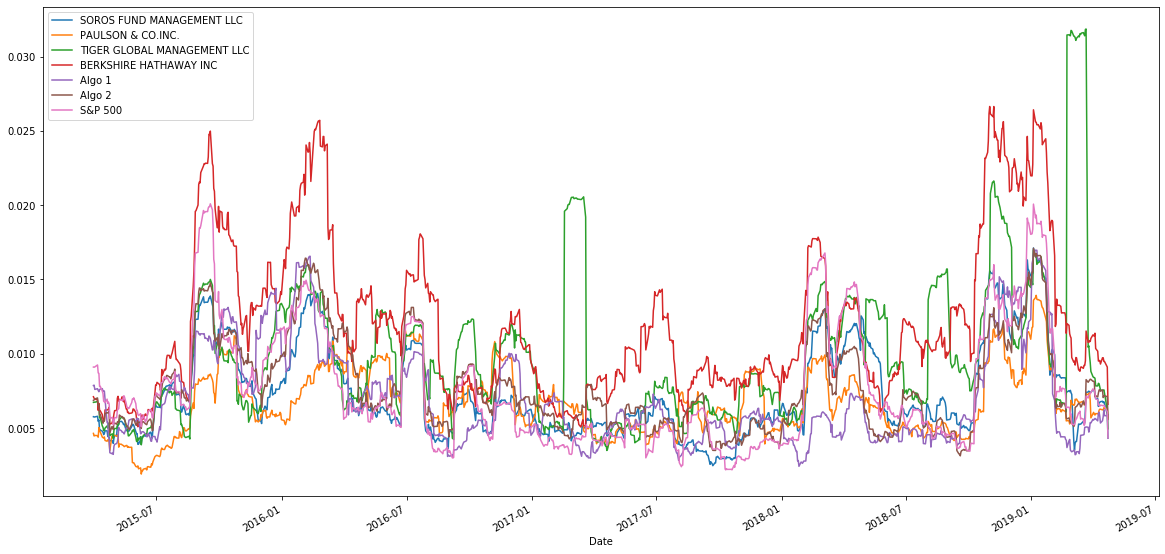

In [25]:
#combined_returns.head()


combined_returns.rolling(window=21).std().plot(figsize=(20, 10))


In [26]:
# Does the risk increase for each of the portfolios at the 
#same time risk increases in the S&P?
#Based on the above graph, the risk increase for each of the portfolios at the 
#same time risk increases in the S&P?

    

In [27]:
# Construct a correlation table
combined_returns.head()

correlation = combined_returns.corr().astype("float")
correlation


# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
S&P 500                      1.000000

In [28]:
#Which returns most closely mimic the S&P?
#Soros Fund Management LLC and Algo 2, most closely mimic the S&P

In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#Calculate Variance of S&P 500 returns

variance = combined_returns['S&P 500'].var()
variance

# Calculate covariance of all daily returns of Berkshire vs. S&P 500
covariance = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['S&P 500'])
covariance

# Calculate beta of all daily returns of Berkshire
Berkshire_beta = covariance / variance
Berkshire_beta

# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

1.1347891297491723

In [30]:
#Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

# Calculate 30-day rolling covariance of Berkshire vs. S&P 500 and plot the data
rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_returns['S&P 500'])
#rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')




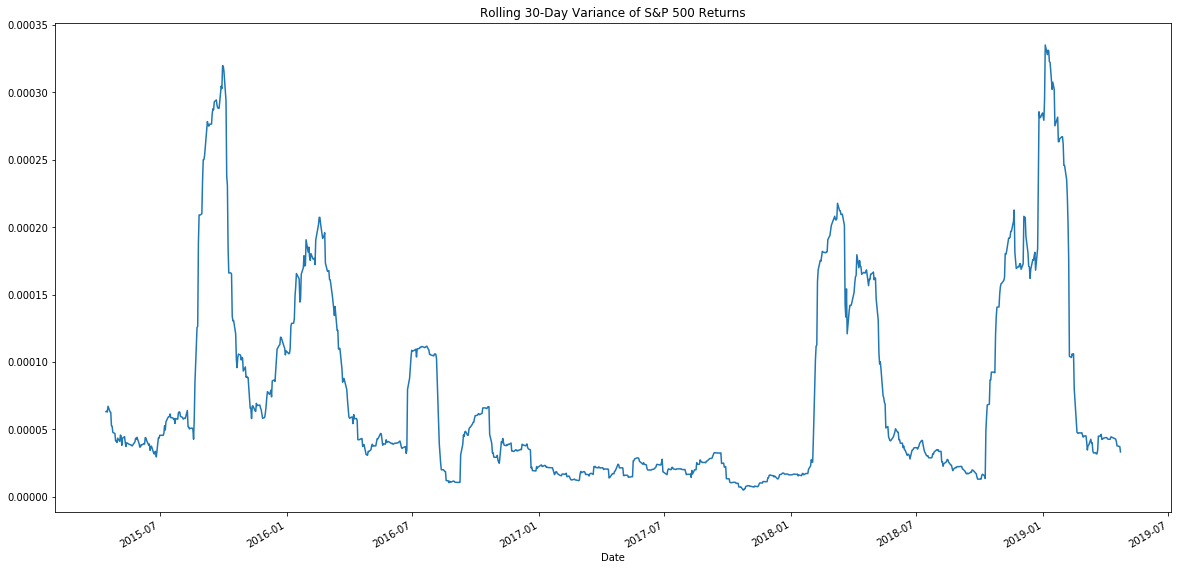

In [31]:
# Calculate 30-day rolling variance of  S&P 500 
rolling_variance = combined_returns['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

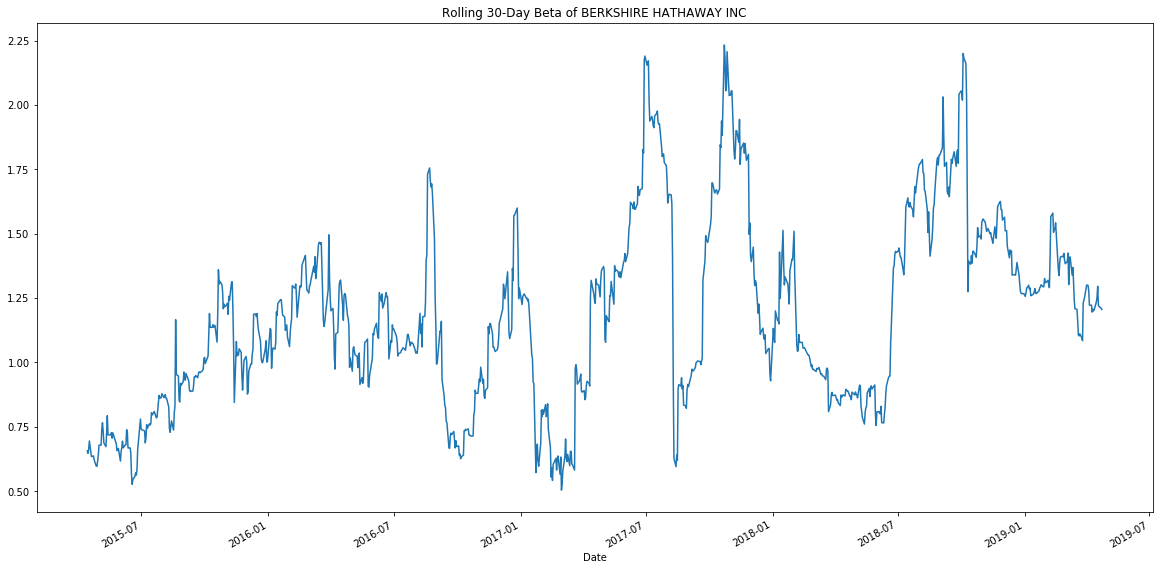

In [32]:
# Calculate 30-day rolling beta of BERKSHIRE and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC')

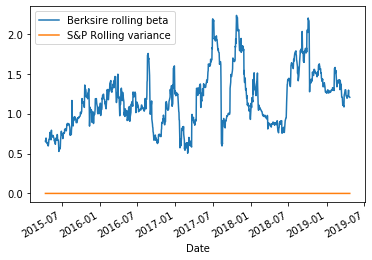

In [33]:
#Does the portfolio seem sensitive to movements in the S&P 500?

# Set figure of the rolling beta of Berkshire
ax = rolling_beta.plot()

# Plot 30-Day Rolling variance of S&P
rolling_variance.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Berksire rolling beta", "S&P Rolling variance"]);



In [34]:
# Calculate a rolling window using the exponentially weighted moving average. 

#Chanllenge

# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [35]:
# Calculate annualized Sharpe Ratios

# Calculate Sharpe Ratio
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

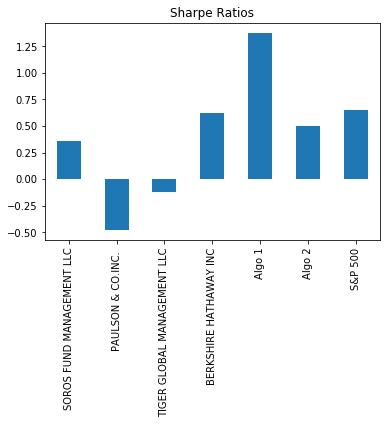

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? 

The Algo 1 outperforms both 'the market' and the whales.  Algo 2 out performs 3 of the whale portfolios but not the S&P.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Read the first stock

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


# set path

csv_path = Path("Resources/amzn_historical.csv")

# Reading Facebook historical close
amzn_historical = pd.read_csv(csv_path)

#Formt date

amzn_historical['Date'] = pd.to_datetime(amzn_historical.Date, dayfirst=True)

amzn_historical.head()

#set Index
amzn_historical = amzn_historical.set_index("Date")


#Check for nulls
amzn_historical.isnull().sum()

amzn_historical.head()


#Sort Index

amzn_historical = amzn_historical.sort_index()

#Insert column for symbol

amzn_historical.insert(0, 'Symbol', 'AMZN')

amzn_historical.head()

#amzn_historical.dtypes

Symbol   Close
Date                              
2017-01-03 16:00:00   AMZN  753.67
2017-01-04 16:00:00   AMZN  757.18
2017-01-05 16:00:00   AMZN  780.45
2017-01-06 16:00:00   AMZN  795.99
2017-01-09 16:00:00   AMZN  796.92

In [38]:
# Read the second stock

# Reading Facebook historical close
fb_historical = pd.read_csv(csv_path)

#Formt date

fb_historical['Date'] = pd.to_datetime(fb_historical.Date, dayfirst=True)

fb_historical.head()

#set Index
fb_historical = fb_historical.set_index("Date")


#Check for nulls
fb_historical.isnull().sum()


#Sort Index
fb_historical = fb_historical.sort_index()

#Insert column for symbol

fb_historical.insert(0, 'Symbol', 'FB')



fb_historical.head()



Symbol   Close
Date                              
2017-01-03 16:00:00     FB  753.67
2017-01-04 16:00:00     FB  757.18
2017-01-05 16:00:00     FB  780.45
2017-01-06 16:00:00     FB  795.99
2017-01-09 16:00:00     FB  796.92

In [39]:
# Read the third stock

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


# set path

csv_path = Path("Resources/twtr_historical.csv")

# Reading Facebook historical close
twtr_historical = pd.read_csv(csv_path)


#Formt date
twtr_historical['Date'] = pd.to_datetime(twtr_historical.Date, dayfirst=True)

twtr_historical.head()

#set Index
twtr_historical = twtr_historical.set_index("Date")


#Check for nulls
twtr_historical.isnull().sum()




#sort Index

twtr_historical = twtr_historical.sort_index()

#Insert column for symbol

twtr_historical.insert(0, 'Symbol', 'TWTR')


twtr_historical.head()




# YOUR CODE HERE

Symbol  Close
Date                             
2017-01-03 16:00:00   TWTR  16.44
2017-01-04 16:00:00   TWTR  16.86
2017-01-05 16:00:00   TWTR  17.09
2017-01-06 16:00:00   TWTR  17.17
2017-01-09 16:00:00   TWTR  17.50

In [40]:
# Concatenate all stocks into a single DataFrame
#join by rows using inner

# concatenate dataframes and reset index
all_prices = pd.concat([amzn_historical, fb_historical, twtr_historical], axis="rows", join="inner")

# Reset the index
all_prices = all_prices.reset_index()
all_prices.head()


#all_prices.dtypes

Date Symbol   Close
0 2017-01-03 16:00:00   AMZN  753.67
1 2017-01-04 16:00:00   AMZN  757.18
2 2017-01-05 16:00:00   AMZN  780.45
3 2017-01-06 16:00:00   AMZN  795.99
4 2017-01-09 16:00:00   AMZN  796.92

In [41]:
# Pivot so that each column of prices represents a unique symbol

all_prices = all_prices.pivot_table(values="Close", index="Date", columns="Symbol")
all_prices.head()


Symbol                 AMZN      FB   TWTR
Date                                      
2017-01-03 16:00:00  753.67  753.67  16.44
2017-01-04 16:00:00  757.18  757.18  16.86
2017-01-05 16:00:00  780.45  780.45  17.09
2017-01-06 16:00:00  795.99  795.99  17.17
2017-01-09 16:00:00  796.92  796.92  17.50

In [42]:
# Drop Nulls
all_prices.dropna().copy()

#all_prices.isnull().sum()


Symbol                  AMZN       FB   TWTR
Date                                        
2017-01-03 16:00:00   753.67   753.67  16.44
2017-01-04 16:00:00   757.18   757.18  16.86
2017-01-05 16:00:00   780.45   780.45  17.09
2017-01-06 16:00:00   795.99   795.99  17.17
2017-01-09 16:00:00   796.92   796.92  17.50
...                      ...      ...    ...
2019-12-23 16:00:00  1793.00  1793.00  32.43
2019-12-24 13:00:00  1789.21  1789.21  32.50
2019-12-26 16:00:00  1868.77  1868.77  32.63
2019-12-27 16:00:00  1869.80  1869.80  32.55
2019-12-30 16:00:00  1846.89  1846.89  32.03

[753 rows x 3 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Calculate weighted portfolio returns
#weights = [1/3, 1/3, 1/3]

# Calculate Daily Returns
all_returns = all_prices.pct_change()
all_returns.head()



Symbol                   AMZN        FB      TWTR
Date                                             
2017-01-03 16:00:00       NaN       NaN       NaN
2017-01-04 16:00:00  0.004657  0.004657  0.025547
2017-01-05 16:00:00  0.030732  0.030732  0.013642
2017-01-06 16:00:00  0.019912  0.019912  0.004681
2017-01-09 16:00:00  0.001168  0.001168  0.019220

In [44]:
# Calculate Portfolio Returns with an equal amount of each stock
weights = [0.333, 0.333, 0.334]
portfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

Date
2017-01-03 16:00:00         NaN
2017-01-04 16:00:00    0.011635
2017-01-05 16:00:00    0.025024
2017-01-06 16:00:00    0.014825
2017-01-09 16:00:00    0.007197
dtype: float64

In [45]:
#Remove time stamp from datetime
portfolio_returns.index = portfolio_returns.index.normalize()

portfolio_returns.head()

Date
2017-01-03         NaN
2017-01-04    0.011635
2017-01-05    0.025024
2017-01-06    0.014825
2017-01-09    0.007197
dtype: float64

In [46]:
combined_returns["my_portfolio"] = portfolio_returns
combined_returns.head()



SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  my_portfolio  
Date                                          
2015-03-03 -0.000949 -0.004539           NaN  
2015-03-04  0.002416 -0.004389           NaN  
2015-03-05  0.004323  0.001196           NaN  
2015-03-06 -0.011460 -0.014174           NaN  
2015-03-09  0.001303  0.003944           NaN

In [47]:
combined_returns.dropna(inplace=True)
combined_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2017-01-04                   0.011581            0.007029   
2017-01-05                   0.003079            0.004107   
2017-01-06                   0.003561           -0.013250   
2017-01-09                  -0.000458            0.002007   
2017-01-10                  -0.001490            0.000394   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2017-01-04                    -0.001011                0.012204  0.012510   
2017-01-05                    -0.004264                0.016092 -0.003955   
2017-01-06                    -0.001213                0.005667 -0.000364   
2017-01-09                    -0.004540               -0.002642  0.002775   
2017-01-10                    -0.000718                0.010586  0.007669   

              Algo 2   S&P 500  my_portfolio  
Date                                          
2017-01-04  0.014701  0.005722      0.011635  
2017-01-05 -0.001872 -0.000771      0.025024  
2017-01-06  0.000051  0.003517      0.014825  
2017-01-09 -0.006277 -0.003549      0.007197  
2017-01-10  0.006618  0.000000     -0.003334

In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [49]:
# Risk
# Box plot to visually show risk
#combined_returns.plot.box(figsize=(15,7))

#Calculate daily standard deviation
daily_std = combined_returns.std()

daily_std.head(10)




SOROS FUND MANAGEMENT LLC      0.007861
PAULSON & CO.INC.              0.006786
TIGER GLOBAL MANAGEMENT LLC    0.011884
BERKSHIRE HATHAWAY INC         0.012496
Algo 1                         0.006721
Algo 2                         0.007570
S&P 500                        0.008137
my_portfolio                   0.018998
dtype: float64

In [50]:
#Check if my portfolio is less risky than the others
daily_std["my_portfolio"]<daily_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
S&P 500                        False
my_portfolio                   False
dtype: bool

In [51]:
# Calculate the annualized standard deviation (252 trading days)


annualized_std = daily_std * np.sqrt(252)

annualized_std


SOROS FUND MANAGEMENT LLC      0.124795
PAULSON & CO.INC.              0.107732
TIGER GLOBAL MANAGEMENT LLC    0.188647
BERKSHIRE HATHAWAY INC         0.198369
Algo 1                         0.106695
Algo 2                         0.120169
S&P 500                        0.129174
my_portfolio                   0.301588
dtype: float64

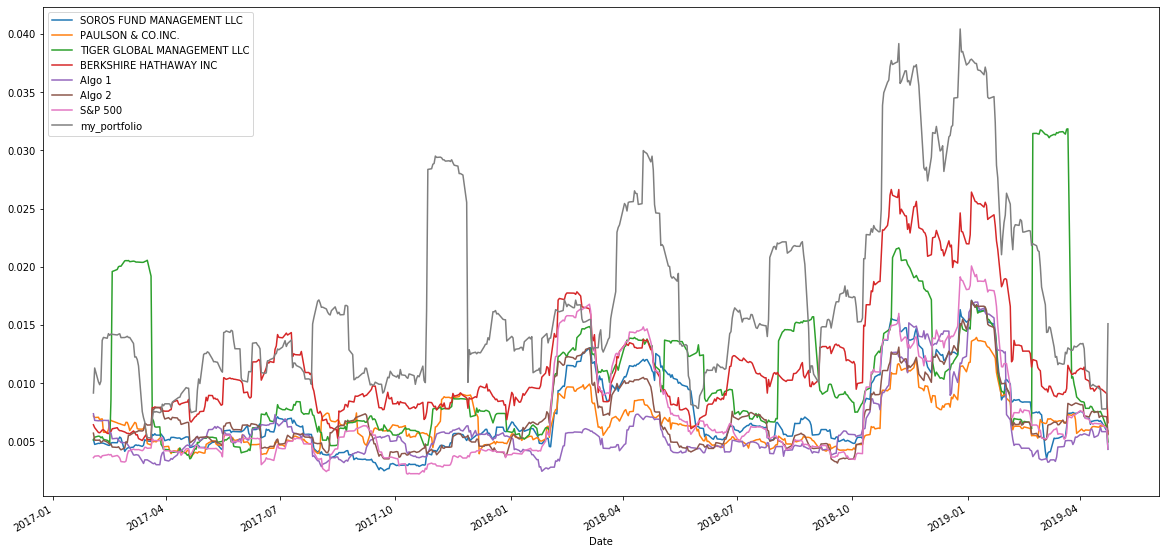

In [52]:
# Rolling

# # Calculate and plot the rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20, 10))

# YOUR CODE HERE

In [53]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.614773
PAULSON & CO.INC.             -0.404520
TIGER GLOBAL MANAGEMENT LLC   -0.888148
BERKSHIRE HATHAWAY INC         1.242706
Algo 1                         1.223376
Algo 2                         0.747427
S&P 500                        0.948652
my_portfolio                   1.561083
dtype: float64

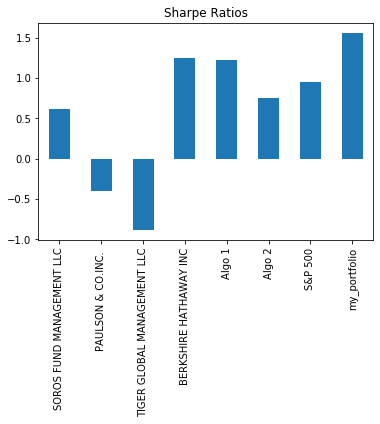

In [54]:
# Visualize the sharpe ratios as a bar plot


sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# YOUR CODE HERE

In [55]:
#My portfolio outperforms all the others including the S&P

In [56]:
# Create a correlation analysis

correlation = combined_returns.corr()
correlation
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.686080   
PAULSON & CO.INC.                             0.686080            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.485794            0.419360   
BERKSHIRE HATHAWAY INC                        0.761123            0.565238   
Algo 1                                        0.279254            0.285009   
Algo 2                                        0.797112            0.718771   
S&P 500                                       0.811876            0.694322   
my_portfolio                                  0.584160            0.455853   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.485794   
PAULSON & CO.INC.                               0.419360   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.344809   
Algo 1                                          0.090185   
Algo 2                                          0.430232   
S&P 500                                         0.525047   
my_portfolio                                    0.262201   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.761123  0.279254  0.797112   
PAULSON & CO.INC.                          0.565238  0.285009  0.718771   
TIGER GLOBAL MANAGEMENT LLC                0.344809  0.090185  0.430232   
BERKSHIRE HATHAWAY INC                     1.000000  0.240730  0.737636   
Algo 1                                     0.240730  1.000000  0.296016   
Algo 2                                     0.737636  0.296016  1.000000   
S&P 500                                    0.798178  0.248901  0.864434   
my_portfolio                               0.715156  0.218338  0.603749   

                              S&P 500  my_portfolio  
SOROS FUND MANAGEMENT LLC    0.811876      0.584160  
PAULSON & CO.INC.            0.694322      0.455853  
TIGER GLOBAL MANAGEMENT LLC  0.525047      0.262201  
BERKSHIRE HATHAWAY INC       0.798178      0.715156  
Algo 1                       0.248901      0.218338  
Algo 2                       0.864434      0.603749  
S&P 500                      1.000000      0.658113  
my_portfolio                 0.658113      1.000000

In [57]:
#There is a 65% correlation between my portfolios and the S&P 500

In [58]:
# Beta
# YOUR CODE HERE


# Calculate variance of all daily returns of my_portfolio vs. S&P 500
variance = combined_returns['S&P 500'].var()

# Calculate covariance of all daily returns of my_portfolio vs. S&P 500
covariance = combined_returns['my_portfolio'].cov(daily_returns['S&P 500'])
covariance

# Calculate beta of all daily returns of my_portfolio
my_portfolio_beta = covariance / variance
my_portfolio_beta

1.5365200291079661

In [59]:
#My portfolio is 53% more volatile than the market

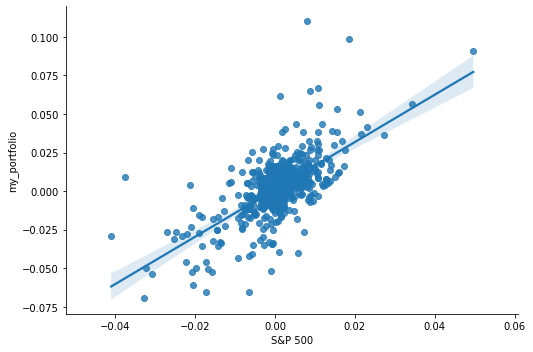

In [60]:
#The plotted beta

# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
import seaborn as sns

sns.lmplot(x="S&P 500", y="my_portfolio", data=combined_returns, aspect=1.5, fit_reg=True)